<a href="https://colab.research.google.com/github/nicolashernandez/teaching_nlp/blob/main/04_repr%C3%A9sentation_vectorielle_continue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Représentation vectorielle continue 

Les [**plongements de mots** (_word embeddings_ en anglais)](https://fr.wikipedia.org/wiki/Word_embedding) désignent le résultat de techniques récentes de vectorisation qui produisent des vecteurs denses de dimensions réduites, prédéfinies, et non corrélées avec la taille du vocabulaire (e.g. 100, 300, 500...). 
Ces techniques reposent sur l'hypothèse distributionnelle de Harris qui veut que les mots apparaissant dans des contextes similaires ont des significations apparentées. 

La méthode de référence est connue sous le nom [**Word2Vec** est attribuée à Mikolov et ses collègues (Google) en 2013](https://github.com/tmikolov/word2vec).
> Tomas Mikolov, Kai Chen, Greg Corrado et Jeffrey Dean, « Efficient Estimation of Word Representations in Vector Space », arXiv:1301.3781 [cs],‎ 16 janvier 2013

Les auteurs proposent deux architectures neuronales à 2 couches [CBOW (_continuous bag of words_) et SkipGram](https://fr.wikipedia.org/wiki/Word2vec#/media/Fichier:CBOW_eta_Skipgram.png).

> Le CBOW vise à prédire un mot étant donné son contexte. Skip-gram a une architecture symétrique visant à prédire les mots du contexte étant donné un mot en entrée. En pratique, le modèle CBOW est plus rapide à apprendre, mais le modèle skip-gram donne généralement de meilleurs résultats.

> La couche cachée contient quelques centraines de neurones et constitue à l'issue de l'entraînement le plongement représentant un mot. La couche de sortie permet d'implémenter une tâche de classification au moyen d'une softmax.

> L'apprentissage ne nécessite néanmoins aucun label, la vérité terrain étant directement déduite des données et plus particulièrement de la proximité des mots au sein du corpus d'entraînement. En ce sens, l'apprentissage de Word2vec constitue un apprentissage auto-supervisé. 

Les vecteurs obtenus sont dits statiques (ou non contextuels) car ils restent tel quel quelle que soit l'occurrence du mot en contexte.

Un second modèle bien connu est celui de [**FastText** (Facebook)](https://github.com/facebookresearch/fastText) qui propose de traiter la variabilité morphologique des mots en construisant des vecteurs non pas pour des mots mais pour des sous-mots (séquence de caractères). Le lecteur d'un mot est la somme de tous les vecteurs des sous-mots le composant. 

Cette approche est indépendante de la langue, et montre de meilleurs résultats que word2vec sur des tâches syntaxiques, surtout quand le corpus d'entraînement est petit. Word2vec est légèrement meilleur pour des tâches sémantiques. Un des avantage de FastText est de pouvoir fournir des vecteurs mêmes pour les mots hors vocabulaires.

Plusieurs **librairies permettent de créer, charger, sauver et manipuler des modèles de plongements de mots**. Nous allons utiliser _gensim_ qui permet aussi bien de travailler avec des modèles [word2vec](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py) que [fasttext](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py).  

Ici une [Comparison of FastText and Word2Vec](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Word2Vec_FastText_Comparison.ipynb)



## Utiliser un modèle word2vec existant avec gensim 

Le dépôt [gensim-data](https://github.com/RaRe-Technologies/gensim-data) contient quelques corpus et modèles pré-entraînés librement disponibles. 




#### QUESTION

* Exécutez le code ci-dessous ou consulter le lien gensim-data et indiquez le nom d'un modèle construit sur la base de tweets si cela existe.



In [1]:
import gensim.downloader as api

api.info()  # show info about available models/datasets
# model = api.load("glove-twitter-25")

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

#### VOTRE REPONSE

**TODO**


Nous allons testé un modèle construit sur le **français**. Il ne fait pas partie de ceux de la gensim-data mais il fait parti des [modèles mis à disposition par Jean-Philippe Fauconnier](https://fauconnier.github.io/#data).

### Récupération et chargement d'un modèle pré-entraîné

In [24]:
# 2021
#!wget -nc https://s3.us-east-2.amazonaws.com/embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin -P model
#!wget -nc https://s3.us-east-2.amazonaws.com/embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_500_skip_cut100.bin -P model
# 2022
#!wget -nc https://embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_500_cbow_cut100.bin -P model
#!wget -nc https://embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_500_skip_cut100.bin -P model
!wget -nc https://embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin -P model
!wget -nc https://embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_200_skip_cut100.bin -P model

--2022-09-19 20:48:15--  https://embeddings.net/embeddings/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin
Resolving embeddings.net (embeddings.net)... 212.107.17.115, 2a02:4780:8:832:0:2384:2470:1
Connecting to embeddings.net (embeddings.net)|212.107.17.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126052447 (120M) [application/octet-stream]
Saving to: ‘model/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin’

frWac_non_lem_no_po 100%[===================>] 120.21M  1.25MB/s    in 96s     

2022-09-19 20:49:52 (1.26 MB/s) - ‘model/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin’ saved [126052447/126052447]

File ‘model/frWac_non_lem_no_postag_no_phrase_200_skip_cut100.bin’ already there; not retrieving.



In [12]:
# Chargement du modèle
from gensim.models import KeyedVectors

#w2v_model_path ="model/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
w2v_model_path = "model/frWac_non_lem_no_postag_no_phrase_500_skip_cut100.bin"

model = KeyedVectors.load_word2vec_format(w2v_model_path, binary=True, unicode_errors="ignore")

### Obtenir les mots similaires 

Pour chaque question ci-dessous, jouez le jeu et prenez le temps faire des propositions de réponses avant d'exécuter le code qui permettra de consulter la connaissance du modèle et connaître ce qu'il répondrait.

Si je vous dis 'roi', vous pensez à quoi ? Faire quelques propositions de synonymes ou de mots substituables sémantiquement proches. La méthode `most_similar` affichera les 10 mots les plus proches d'un mot donné, du plus similaire au moins similaire, avec pour chacun un score de similarité avec le mot donné (scores décroissants donc).

In [13]:
# obtenir les mots similaires à 1 mot
model.most_similar("roi")

[('trône', 0.743701159954071),
 ('régente', 0.705065906047821),
 ('duc', 0.703737735748291),
 ('chambellan', 0.6829988956451416),
 ('prince', 0.6821834444999695),
 ('reine', 0.6814997792243958),
 ('rois', 0.6601805686950684),
 ('connétable', 0.6411278247833252),
 ('souverain', 0.6409915685653687),
 ('charles-quint', 0.6395503282546997)]

Si je vous demande de me donner des mots relatifs à des 'palais' et 'paris', à quoi pensez-vous ? Pour information, la méthode accepte une liste de mots en paramètres. 

In [14]:
# obtenir les mots similaires relatifs à une liste
model.most_similar(['palais', 'paris'])

[('palais-royal', 0.5767269730567932),
 ('champs-elysées', 0.5534590482711792),
 ('trocadéro', 0.5271068215370178),
 ('carrousel', 0.5267265439033508),
 ('rivoli', 0.517971396446228),
 ('tuileries', 0.5163304805755615),
 ('m°', 0.5153165459632874),
 ('bastille', 0.5104326009750366),
 ('chaillot', 0.5056830048561096),
 ('vaugirard', 0.500359833240509)]

Si j'ajoute les vecteurs de roi et de femme et que je retire le vecteur homme qu'est ce que j'obtiens ? Répondez avant d'exécuter le code ci-dessous.



In [18]:
# Si j'ajoute les vecteurs de roi et de femme et que je retire le vecteur homme qu'est ce que j'obtiens ?
model.most_similar(positive = ['roi', 'femme'], negative = ['homme'])

[('désespoir', 0.7093222737312317),
 ('bonheur', 0.7016983032226562),
 ('allégresse', 0.7003583908081055),
 ('larmes', 0.6927555799484253),
 ('amour', 0.6797648668289185),
 ('tendresse', 0.6784462928771973),
 ('émotion', 0.6661418676376343),
 ('gaieté', 0.6592296361923218),
 ('chagrin', 0.6360461711883545),
 ('compassion', 0.6322124600410461)]

#### QUESTION

* Même question mais si j'ajoute les vecteurs de 'paris' et de 'japon' et que je retire le vecteur de 'france'. Faites une proposition et écrivez le code pour vérifier.


#### VOTRE REPONSE

**TODO**

In [ ]:
# TODO

#### QUESTION
* Que pensez-vous de la "puissance" de ce type de modèle ? Vos propositions se trouvaient-elles parmis les suggestions du modèle ?
* Reprenez ces cas d'usage et faites quelques expériences pour essayer de piéger le modèle. Quelles erreurs ou limites trouvez-vous ? Donnez les codes qui vous conduisent à vos conclusions.

Au passage, si vous êtes "joueurs" de jeux de société, je vous recommande [Just one word](https://www.letempledujeu.fr/zoom61293.html). 


#### VOTRE REPONSE

**TODO**

In [ ]:
# TODO

### Visualiser les plongements lexicaux dans un graph en 2D

Pour ce faire, il faut transformer les vecteurs de n dimensions à des vecteurs à 2 dimensions. La réduction des dimensions est effectuée à l'aide d'une [analyse en composantes principales (ACP ou PCA pour _Principal Component Analysis_ en anglais)](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales).

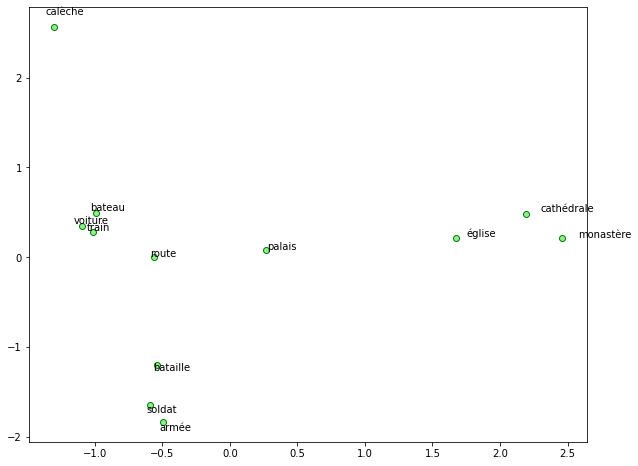

In [19]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#words = sum([[k] + v for k, v in similar_words.items()], [])
#words = ['roi', 'reine']
# soit une liste de mots à projeter
words = ['palais', 'église', 'cathédrale', 'monastère', 'route', 'train', 'bateau', 'calèche', 'voiture', 'armée', 'soldat', 'bataille']
wvs = model[words]

# Application de la transformation PCA qui réduit les vecteurs à 2 dimensions
pca = PCA(n_components=2)
#np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

# Affichage 
fig = plt.figure(figsize=(10, 8))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x*1.05, y*1.05), xytext=(0, 0), textcoords='offset points')

#### QUESTION

* Est-ce que les synonymes se retrouvent bien dans les mêmes zones spatiales ? Vous pouvez tester avec d'autres listes de mots.

#### VOTRE REPONSE

**TODO**

### Visualiser les plongements lexicaux en 3D dynamique à l'aide du _projector de tensorflow_

Sur https://radimrehurek.com/gensim/scripts/word2vec2tensor.html, on peut lire comment convertir un modèle w2v (éventuellement produit par gensim) en modèle tsv, puis comment le visualiser avec le projector de tensorflow : 

1. Convert your word-vector with word2vec2tensor method ou le script gensim.scripts.word2vec2tensor 
2. Open http://projector.tensorflow.org/
3. Click “Load Data” button from the left menu.
4. Select “Choose file” in “Load a TSV file of vectors.” and choose “/tmp/my_model_prefix_tensor.tsv” file.
5.  Select “Choose file” in “Load a TSV file of metadata.” and choose “/tmp/my_model_prefix_metadata.tsv” file.
6. ???
7. PROFIT!

Le code ci-dessous définit des fonctions de conversion au format de tensorflow soit depuis le format gensim-w2v soit le format w2v binaire natif. 

In [20]:
import gensim
from gensim.scripts.word2vec2tensor import word2vec2tensor

def convert_gensim_w2v_to_w2v (gensim_w2v_in_path, w2v_out_path):
  """
  convert a model from gensim_w2v format to w2v (orginal) format
  """
  w2v_model = KeyedVectors.load(gensim_w2v_in_path)
  vectors = w2v_model.wv
  # save memory
  # del model

  # The trained word vectors can also be stored/loaded from a format compatible
  # with the original word2vec implementation via Word2Vec.wv.save_word2vec_format 
  # and gensim.models.keyedvectors.KeyedVectors.load_word2vec_format().
  vectors.save_word2vec_format(w2v_out_path, binary = True)

def convert_w2v_to_tsv (w2v_in_path, tsv_out_path):
  """
  convert a model from w2v original format to tsv format
  """
  # When running word2vec2tensor with a file resulting from 
  # save_word2vec_format, we obtain the following error:
  # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 0: invalid start byte
  # To solve the issue, I have to load with load_word2vec_format the saved file 
  # and save it again with save_word2vec_format
  w2v_model = gensim.models.KeyedVectors.load_word2vec_format(w2v_in_path, binary=True, unicode_errors='ignore')   
  w2v_model.wv.save_word2vec_format(w2v_in_path+".tmp", binary = True)
  word2vec2tensor(w2v_in_path+".tmp", tsv_out_path,  binary = True)

def convert_gensim_w2v_to_tsv (gensim_w2v_in_path, tsv_out_path):
  """
  convert a model from gensim w2v format to tsv format
  """
  convert_gensim_w2v_to_w2v (gensim_w2v_in_path, gensim_w2v_in_path+".tmp")
  convert_w2v_to_tsv (gensim_w2v_in_path+".tmp", tsv_out_path)

Convertissons le modèle public récupéré

In [21]:
convert_w2v_to_tsv(w2v_model_path, w2v_model_path+".tsv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


#### QUESTION

Télécharger les 3? fichiers produits et chargez les dans projector tensorflow. Si c'est trop compliqué, le projector vient avec des modèles préchargés. 

* Observez-vous des zones plus denses que d'autres ? Qu'est ce que cela peut vouloir signifier ? 
* Testez les labels 3D, de cliquer sur un point/mot (fixer le voisinage à la valeur minimale) pour observer l'illumination d'une zone, chercher un mot, visualiser 'isolate 6 points'. 
* Testez aussi un des tensors found disponible comme Word2Vec 10K ou all.


#### VOTRE REPONSE

**TODO**


## Construire un modèle word2vec et fasttext avec gensim


Word2Vec et FastText prennent tous deux un corpus normalisé segmenté en phrases et tokenisés en mots. 

On pourrait très bien utiliser spaCy ou nltk pour ce faire, mais ce type de pré-traitement prend "un peu de temps". On va directement utilisé un corpus de la base nltk disponible avec la segmentation en phrases et la tokenization mots.

Le code ci-dessous utilise le sélection du corpus gutenberg segmentée en phrases et en tokens par nltk.

In [22]:
import re
import nltk
nltk.download('gutenberg')
nltk.download('punkt')

nltk_gutenberg_corpus = list()
word_counter = 0

for fileid in nltk.corpus.gutenberg.fileids():
  segmented_and_tokenized_doc = nltk.corpus.gutenberg.sents(fileid)
  for sent in segmented_and_tokenized_doc:
    words = [re.sub(r'[^a-zA-Z\s]', '', word, re.I|re.A).lower() for word in sent]
    # 98552 2621785
    words = [word for word in words if len(word) > 3]
    # 95804 1154977
    if len(words)>0: 
      nltk_gutenberg_corpus.append(words)
      word_counter += len(words)
      
print ('sentences_len:', len(nltk_gutenberg_corpus), 'words_len:', word_counter)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


sentences_len: 95801 words_len: 1154977


Hyper-paramètres les plus communs du constructeur de la [classe Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) :

* `corpus`: List of tokenized sentences 
* `size` : Dimensionality of the word vectors (default: 100)
* `window` : Maximum distance between the current and predicted word within a sentence
* `sg` : Training algorithm: 1 for skip-gram; otherwise CBOW
* `iter` :  Number of iterations (epochs) over the corpus
* `workers` Use these many worker threads to train the model (=faster training with multicore machines)





In [23]:
# Set values for various parameters
lr = 0.05   # Learning rate
dim = 100   # Word vector dimensionality  
ws = 5      # Context window size    
epoch = 5
minCount = 5 # Minimum word count 
neg = 5
loss = 'ns'
t = 1e-4
#sample = 1e-3   # Downsample setting for frequent words
sg=1 

params = {
    'alpha': lr,
    'size': dim,
    'window': ws,
    'iter': epoch,
    'min_count': minCount,
    'sample': t,
    'sg': 1,
    'hs': 0,
    'negative': neg
}

Construction des modèles. Observez la rapidité compte tenu du nombre de mots.

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

# 
%time w2v_model = Word2Vec(nltk_gutenberg_corpus, **params) 

# save the model
!mkdir -p models
w2v_model_path = 'models/w2v_nltk-gutenberg_100_5_5_sg.gensim-bin'
w2v_model.save(w2v_model_path)

CPU times: user 36.2 s, sys: 147 ms, total: 36.3 s
Wall time: 20.5 s


In [ ]:
from gensim.models.fasttext import FastText

#
%time ft_model = FastText(nltk_gutenberg_corpus, **params)

# save the model
!mkdir -p models
ft_model_path = 'models/ft_nltk-gutenberg_100_5_5_sg.gensim-bin'
ft_model.save(ft_model_path)

Si vous souhaitez visualiser le modèle construit et sauvé au format gensim-w2v via projector tensorflow, vous pouvez exécuter la commande suivante et vous rendre à la section précédente "visualiser un modèle w2v en 3D via projector tensorflow". 

In [ ]:
w2v_model_path = 'models/w2v_nltk-gutenberg_100_5_5_sg.gensim-bin'
tensor_filename = 'models/tensor_nltk-gutenberg_100_5_5_sg.tsv'

convert_gensim_w2v_to_tsv(w2v_model_path, tensor_filename)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


## Comparer et évaluer deux modèles

[`gensim` implémente la comparaison de modèles](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Word2Vec_FastText_Comparison.ipynb) selon la tâche de **raisonnement analogique** telle que décrite à la [section 4.1 du papier de 2013 de Mikolov et al.](https://arxiv.org/pdf/1301.3781v3.pdf).

```
:capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
...
:capital-world
Algiers Algeria Baghdad Iraq
Ankara Turkey Dublin Ireland
...
: city-in-state
Chicago Illinois Houston Texas
Chicago Illinois Philadelphia Pennsylvania
...
: gram1-adjective-to-adverb
amazing amazingly apparent apparently
amazing amazingly calm calmly
...
```

D'autres évaluations intrinsèques sont possibles comme le [calcul d'un coefficient de corrélation entre un taux de similarité calculée sur la base d'une appréciation humaine et un score de similarité cosinus entre des représentations Word2Vec](https://nlp-ensae.github.io/materials/course2/).



Ci-dessous nous mettons en oeuvre la tâche de raisonnement analogique de Mikolov et al.

In [ ]:
# download the file questions-words.txt to be used for comparing word embeddings
!wget https://raw.githubusercontent.com/tmikolov/word2vec/master/questions-words.txt

In [ ]:
# un oeil sur les n premières lignes du fichier
!head questions-words.txt

Définition de la méthode de calcul de la performance de resolution de la tâche d'analogie

In [ ]:
def print_accuracy(model, questions_file):
    print('Evaluating...\n')
    acc = model.accuracy(questions_file)
    #acc = model.wv.evaluate_word_analogies(questions_file)

    sem_correct = sum((len(acc[i]['correct']) for i in range(5)))
    sem_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5))
    sem_acc = 100*float(sem_correct)/sem_total
    print('\nSemantic: {:d}/{:d}, Accuracy: {:.2f}%'.format(sem_correct, sem_total, sem_acc))
    
    syn_correct = sum((len(acc[i]['correct']) for i in range(5, len(acc)-1)))
    syn_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5,len(acc)-1))
    syn_acc = 100*float(syn_correct)/syn_total
    print('Morphologic: {:d}/{:d}, Accuracy: {:.2f}%\n'.format(syn_correct, syn_total, syn_acc))
    return (sem_acc, syn_acc)

Exécution de l'évaluation

In [ ]:
#
word_analogies_file = 'questions-words.txt'

print('\nLoading Word2Vec embeddings')
w2v_model = KeyedVectors.load(w2v_model_path)
print('Accuracy for Word2Vec:')
print_accuracy(w2v_model, word_analogies_file)

print('\nLoading FastText embeddings')
ft_model = KeyedVectors.load(ft_model_path)
print('Accuracy for FastText (with n-grams):')
print_accuracy(ft_model, word_analogies_file)

#### QUESTION
* Lequel des deux modèles donnent les meilleurs résultats sur l'analyse morphologique ? Sur l'analyse sémantique ? Est-ce cohérent de ce que vous connaissez des modèles ? 
* Relancez la construction des modèles puis leur comparaison. Obtenez-vous les mêmes scores de performance ? Pourquoi ?
* Les données d'entraînement sont des romans classiques issus de la collection Gutenberg. Si les données avaient été issues de la Wikipedia, quels résultats auraient pu changer ? Si vous souhaitez tester, ci-dessous je vous donne un snippet de code qui récupère une version normalisée de la wikipédia et qui lance la contruction des modèles w2v et ft. Cela prendra qqs minutes... 
* Selon vous, dans une perspective de comparaison de modèles, est-ce important de construire ceux-ci sur les mêmes données ? 

In [ ]:
# WARNING: ce qui suit est optionnel !

# récupération d'un corpus normalisé de la wikipédia-en
# une string tokenisée avec le caractère espace de mots pleins 
!mkdir data
!wget -nc http://mattmahoney.net/dc/text8.zip -P data
!unzip data/text8.zip -d data

text8_path = 'data/text8'

# Text8Corpus class for reading space-separated words file
from gensim.models.word2vec import Text8Corpus

# Construction des modèles w2v et ft avec text8
%time w2v_model = Word2Vec(Text8Corpus(text8_path), **params)
%time ft_model = FastText(Text8Corpus(text8_path), **params)

#### VOTRE REPONSE

**TODO**



## Construire une représentation continue de document


> Une approche naïve de la _représentation du sens d'un document revient à faire la moyenne des vecteurs des mots qui le composent_. [Le and Mikolov in 2014](https://cs.stanford.edu/~quocle/paragraph_vector.pdf) 

L'API de spaCY permet aisément d'accéder aux embeddings des mots d'un document. Elle propose aussi une représentation vectorielle des documents sous la forme de la moyenne des vecteurs de mots qui les composent. L'API permet aussi de calculer des similarités entre ces vecteurs (mot/mot, document/document, document/mot).

Les modèles de spacy embarquent généralement des  vecteurs de mots de type Word2Vec (éviter un modèle _sm/small_). L'import des formats gensim, fastext ou Word2Vec est possible. 

Pour ces raisons nous utiliserons ici [spaCy](https://spacy.io/usage/linguistic-features#vectors-similarity). Remarquez que gensim offre les mêmes fonctionnalités sous le nom de [doc2vec et de paragraph vector](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py).

In [ ]:
# sélectionner le modèle à installer
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_trf
!python -m spacy download en_core_web_md

# redémarrer l'environnement d'exécution

In [ ]:
# charger le modèle
import spacy
nlp = spacy.load('en_core_web_md')

Après traitement (via la méthode `nlp`), on accède au vecteur d'un mot ou du document via la propriété `vector`.

In [ ]:
# trois documents traités avec spaCy
doc1 = nlp('The dog is lazy but the brown fox is quick!')
doc2 = nlp('The quick brown fox jumps over the lazy dog.')
doc3 = nlp('The sky is blue and beautiful.')

# trois mots du 1er document
dog = doc1[1]
lazy = doc1[3]
fox = doc1[7]

# la représentation vectorielle continue d'un mot
print(dog.text, dog.vector)

SpaCy permet aussi d'accéder facilement à l'embedding d'un document (résultant de la moyenne des embeddings des mots qui le composent). 


In [ ]:
# la représentation vectorielle continue d'un document
print (doc1.text, doc1.vector)

L'API offre une fonction de calcul de similarité [`similarity`](https://spacy.io/usage/vectors-similarity), ci-dessous illustrée sur la comparaison de mots. 


In [ ]:
print(dog.similarity(lazy))
print(dog.similarity(fox))


#### QUESTION

* En écrivant le code qui va bien, indiquez quelle est la dimension des vecteurs embarqués par le modèle de spaCy chargé ? Vérifiez que les documents font la même taille. Est-ce d'ailleurs normal ?

* Expérimentez la fonction de calcul de similarité sur les documents courts doc1/doc2 et doc1/doc3. Donnez le code.



#### VOTRE REPONSE

**TODO**


In [ ]:
#TODO

#### QUESTION

nltk embarque des corpus de textes libres notamment des textes de la [collection gutenberg](https://www.gutenberg.org/about/).

* Le code ci-dessous permet de charger trois textes dans un format brut. Deux sont de Shakespeare à savoir _Hamlet_ et _Macbeth_ et un est de Lewis Carroll à savoir _Alice aux pays des merveilles_. Ajouter le code permettant de calculer la similarité des textes hamlet/macbeth et hamlet/alice.
* En observant les résultats des calculs de similarité entre petits documents et entre documents, trouvez-vous que la représentation des documents calculée comme une moyenne des vecteurs des mots qui les composent est fiable ?

In [ ]:
import nltk

# lister les textes présents dans la collection gutenberg
print(nltk.corpus.gutenberg.fileids())

# récupère le texte de trois oeuvres
hamlet = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt') # .words() pour le texte tokenisé
macbeth = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')
alice = nltk.corpus.gutenberg.raw('carroll-alice.txt')


print ('hamlet', len(hamlet), hamlet[:100], '----')
print ('macbeth', len(macbeth), macbeth[:100], '----')
print ('alice', len(alice), alice[:100], '----')

#### VOTRE REPONSE

**TODO**



In [ ]:
# TODO


## Partitionnement sur la base d'une représentation document-embeddings

Cette section fait écho aux sections de partionnements sur la base de représentation des documents de la forme document-terms et document-thèmes d'un notebook antérieul. La méthode de partitionnement kmeans est utilisée.

Les lignes de code ci-dessous déclare un corpus, le pré-traite (i.e. calcul les vecteurs continus des documents) et affiche le corpus sous la forme d'une dataframe.

In [ ]:
import numpy as np

# déclaration de la donnée
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

# pré-traitement
dt_matrix = [nlp(doc).vector for doc in corpus]

# affichage visuel
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

Le code suivant opère le clustering et l'affichage des classes prédites.

In [ ]:
# clustering des documents selon la méthode kmeans 
# en utilisant la distribution des thèmes et non la distrubution des termes 
# comme traits discriminants entre documents
from sklearn.cluster import KMeans
# Warning: ici n_clusters ne doit pas être touché
km = KMeans(n_clusters=3, random_state=0)
#km.fit_transform(features)
km.fit_transform(dt_matrix)

# affichage des clusters
cluster_labels = km.labels_
import pandas as pd
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

#### QUESTION

* De prime abord, est-ce que ce type de représentation vous semble exploitable avec des textes courts ? 

#### VOTRE REPONSE

**TODO**

# Références
* représentation continue de document https://github.com/clement-plancq/outils-corpus/blob/master/outils_corpus-7.ipynb
* https://nlp-ensae.github.io/materials/course2/

# Pour aller plus loin

[Le sujet suivant se fonde sur une proposition de 2021 de Nicolas Dugué](https://github.com/nicolasdugue/atal/blob/master/README.md#lapproche-textrank-pour-le-r%C3%A9sum%C3%A9-automatique).

## L'approche TextRank pour le résumé automatique

Pour ce travail, vous avez besoin de : 
- scipy, numpy
- gensim
- nltk/spacy
- networkx

L'approche *Textrank* pour le résumé automatique est une baseline très efficace et très communément utilisée **[Mihalcea et Tarau]**. L'approche *Textrank* est une approche de résumé automatique dite **extractive** : il s'agit de résumer un document via **l'extraction** de phrases considérées comme caractéristiques du contenu du document. *Textrank* permet également d'extraire les mots-clés pour un document afin de l'indexer, mais nous nous concentrons ici sur l'approche de résumé automatique.
 
Cette approche est basée sur l'algorithme du *Pagerank*, l'algorithme qui a notamment rendu célèbre le moteur de recherche Google **[Brin et Page]**. Ce dernier  s'applique sur des données structurées sous forme de graphe, et la construction de ce graphe est donc l'une des premières étapes de l'approche *Textrank* que nous détaillons ci-après : 
1. Séparation du document en phrases (`nltk.sent_tokenize` vous aidera) ;
2. Nettoyage des phrases (lowercase avec `.lower()`, suppression ponctuation avec `table = str.maketrans(dict.fromkeys(string.punctuation))`)
3. Représentation vectorielle des phrases avec **word2vec** : chaque phrase est représentée par la moyenne des vecteurs des mots (`.get_vector(mot)` avec l'objet gensim) qui la composent. Certains mots de la phrase peuvent ne pas être dans le vocabulaire du modèle pré-appris (exception `KeyError`), on ne tient pas compte de ces mots pour le calcul.
4. Calcul de la similarité cosine (`scipy.spatial.distance.cosine`) de chacune des paires de phrases : matrice de similarité ;
5. Création d'un graphe valuée en utilisant la matrice de similarité (`networkx.from_numpy_array`) ;
6. Run de l'algorithme du Pagerank (`networkx.pagerank`);
7. Ranking des phrases dans l'ordre décroissant du score de Pagerank.

Dans l'algorithme original de *Textrank*, les étapes 3 et 4 n'utilisent pas d'approches de plongements lexicaux (word embeddings). Nous proposons donc l'implémentation d'une approche originale de *Textrank* exploitant les plongements lexicaux. 

Testez votre approche sur n'importe quel document et comparez là avec *gensim.summarization.summarizer*. 
Vous pouvez également tenter de résumer une publication scientifique, et comparer votre résumé avec *l'abstract* humain qui en est le résumé produit par les auteurs. Pour comparer deux résumés, vous pouvez considérer la métrique *Rouge* : https://pypi.org/project/rouge/


**[Mihalcea et Tarau]** Mihalcea, R., & Tarau, P. (2004). Textrank: Bringing order into text. In Proceedings of the 2004 conference on empirical methods in natural language processing (pp. 404-411).

**[Brin et Page]** Brin, S., & Page, L. (1998). The anatomy of a large-scale hypertextual web search engine. Computer networks and ISDN systems, 30(1-7), 107-117.



#### VOTRE CODE

**TODO**

#### VOTRE RETOUR D'EXPÉRIENCE

**TODO**

## Références

* Si des phrases ou des mots sont pondérées, des outils pythons peuvent les sélectionner cf. `heapq.nlargest()` https://medium.com/analytics-vidhya/text-summarization-using-spacy-ca4867c6b744